# CSE527 Homework 3
**Due date: 23:59 on Nov 26, 2023 **

## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

Settings used for assignments: ***Edit -> Notebook Settings -> Runtime Type (Python 3)***.


## Description
---
This homework contains three parts.  
```
Part 1 - Spinning up yolov5 and yolov8 (10 points)    
          You will be using pretrained models from git repo/libraries to run detection of set of images
Part 2 - Finetuning DETR to detect object centroids (60 points)
          You will complete the 5 missing code blocks in the Detection transformer's training pipeline
Part 3 - Implementing UNet based segmentation model (30 points)
          You will code the slightly modified versions of UNet segmentation models  
```

Note: GPU is necessary to complete parts 2 and 3. So keeping in mind that colab has limited GPU time for users, try to use conserve GPU by disabling it in part 1.







## HW3 Part 1
---
While deep learning-based models are getting more and more complicated, it is relatively easy to run them. In this assignment part, we will try to use YOLOv5 and YOLOv8 models on a small subset of MS COCO images.

**Organizing the homework project files in your working space**
```
{last name}_{first name}_{sbu id}_hw3/
├── part1/
│   └── CSE527_23F_HW3.ipynb
├── part2/
│   ├── CSE527_23F_HW3_P2.ipynb
│   └── detr/
├── part3/
│   ├── CSE527_23F_HW3_P3.ipynb
│   └── unet/
└── coco/
```

Create a directory named  `{last name}_{first name}_{sbu id}_hw3` and this will server as your `HW3_ROOT_PATH`.
Further you will have the 3 parts organized inside it as shown above. The coco dataset we will be using will also be in the root directory.

### MS COCO subset dataset

Through out the homework 3 we will be using a small subset of MS COCO dataset (https://cocodataset.org/#home). Given the limited resources (gpu), you will only work on one class of objects: i.e, horses (why horses? you will see in part 2).Overall there are 500 images for training and 50 images for validation.

To load the dataset, place the [coco.zip dataset](https://drive.google.com/file/d/1GVyxYHwVgiG9z_Sn46wslT_2n65DLZRw/view?usp=sharing) at `HW3_ROOT_PATH`.

To pull this zip into your google drive, you have to first add the zip file as shortcut to root hw directory. To do this, open the above link and click on "Add shortcut to Drive" button (drive symbol with a plus) and navigate to correct path and add shortcut.



### Setting path variable

In [1]:
HW3_ROOT_PATH = '/gdrive/MyDrive/' + 'CSE527/Wen_Shihao_113085521_hw3/' #'FILL IN YOUR HOMEWORK3 ROOT HERE'
PATH_TO_PART1 = HW3_ROOT_PATH + 'part1/'
PATH_TO_COCO = HW3_ROOT_PATH + 'coco/'
# TRY to use these variable wherever you load/save some file

In [2]:
from google.colab import drive
drive.mount('/gdrive')
# CD into root of your homework2 part3 directory
%cd -q $HW3_ROOT_PATH

Mounted at /gdrive


### Unzip the dataset to ROOT/coco/

In [ ]:
!unzip -n coco.zip

Archive:  coco.zip
   creating: coco/
   creating: coco/train2017/
  inflating: coco/train2017/000000268124.jpg  
  inflating: coco/train2017/000000384157.jpg  
  inflating: coco/train2017/000000075800.jpg  
  inflating: coco/train2017/000000213432.jpg  
  inflating: coco/train2017/000000172406.jpg  
  inflating: coco/train2017/000000163965.jpg  
  inflating: coco/train2017/000000511103.jpg  
  inflating: coco/train2017/000000170173.jpg  
  inflating: coco/train2017/000000342703.jpg  
  inflating: coco/train2017/000000385540.jpg  
  inflating: coco/train2017/000000396754.jpg  
  inflating: coco/train2017/000000352290.jpg  
  inflating: coco/train2017/000000456147.jpg  
  inflating: coco/train2017/000000342322.jpg  
  inflating: coco/train2017/000000381069.jpg  
  inflating: coco/train2017/000000215493.jpg  
  inflating: coco/train2017/000000456773.jpg  
  inflating: coco/train2017/000000461086.jpg  
  inflating: coco/train2017/000000413634.jpg  
  inflating: coco/train2017/000000479929

## Part 1
---
You will use the models [YOLOv5](https://github.com/ultralytics/yolov5) and [YOLOv8](https://github.com/ultralytics/ultralytics) to detect the objects in the 50 validation images at `PATH_TO_COCO/val2017/`.

In this part, you should use the above mentioned libraries as much as you can.

You should try using the _medium_ sized newtorks for both tasks.

## YOLOv5 task (5 points)
There are 50 images in the directory `PATH_TO_COCO/val2017/`. You should use [YOLOv5](https://github.com/ultralytics/yolov5) to detect as many objects as possible and display those bounding boxes overlaying on the input image as shown below:
![](https://drive.google.com/uc?export=view&id=1EtT36V44OSbA59Zsyi-WiTURaS9kTyVz)

The 50 predicted images should all be saved to a folder and displayed using the method `show_images(folder_path)`


In [ ]:
!mkdir -p '{PATH_TO_PART1}'
%cd $PATH_TO_PART1
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt

/gdrive/MyDrive/CSE527/Wen_Shihao_113085521_hw3/part1
fatal: destination path 'yolov5' already exists and is not an empty directory.
/gdrive/MyDrive/CSE527/Wen_Shihao_113085521_hw3/part1/yolov5


In [3]:
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
import cv2

def show_images(folder_path):
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    image_paths = image_paths[:50]
    rows = 5
    cols = 10
    fig, axes = plt.subplots(rows, cols, figsize=(18, 8))
    for i, image_path in enumerate(image_paths):
        image = cv2.imread(image_path)
        row = int(i / cols)
        col = i % cols
        axes[row, col].imshow(image)
        axes[row, col].set_title(os.path.basename(image_path))
        axes[row, col].axis('off')
    plt.tight_layout()
    plt.show()

In [9]:
import torch
from pathlib import Path
device = torch.device("cpu")

PATH_TO_VAL = PATH_TO_COCO + 'val2017/'
OUTPUT_PATH = HW3_ROOT_PATH + 'output_part1/yolov5/'

model = torch.hub.load("ultralytics/yolov5", "yolov5s").to(device)

image_paths = [str(img_path) for img_path in Path(PATH_TO_VAL).glob('*.jpg')][:50]

Path(OUTPUT_PATH).mkdir(parents=True, exist_ok=True)

for img_path in image_paths:
    img = cv2.imread(img_path)

    results = model(img)

    plt.imshow(results.render()[0])
    plt.axis('off')
    plt.savefig(OUTPUT_PATH + Path(img_path).name)
    plt.close()

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'Pillow>=10.0.1'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 151.6 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 11.2s, installed 2 packages: ['gitpython>=3.1.30', 'Pillow>=10.0.1']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2023-11-24 Python-3.10.12 torch-2.1.0+cu118 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 90.9MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


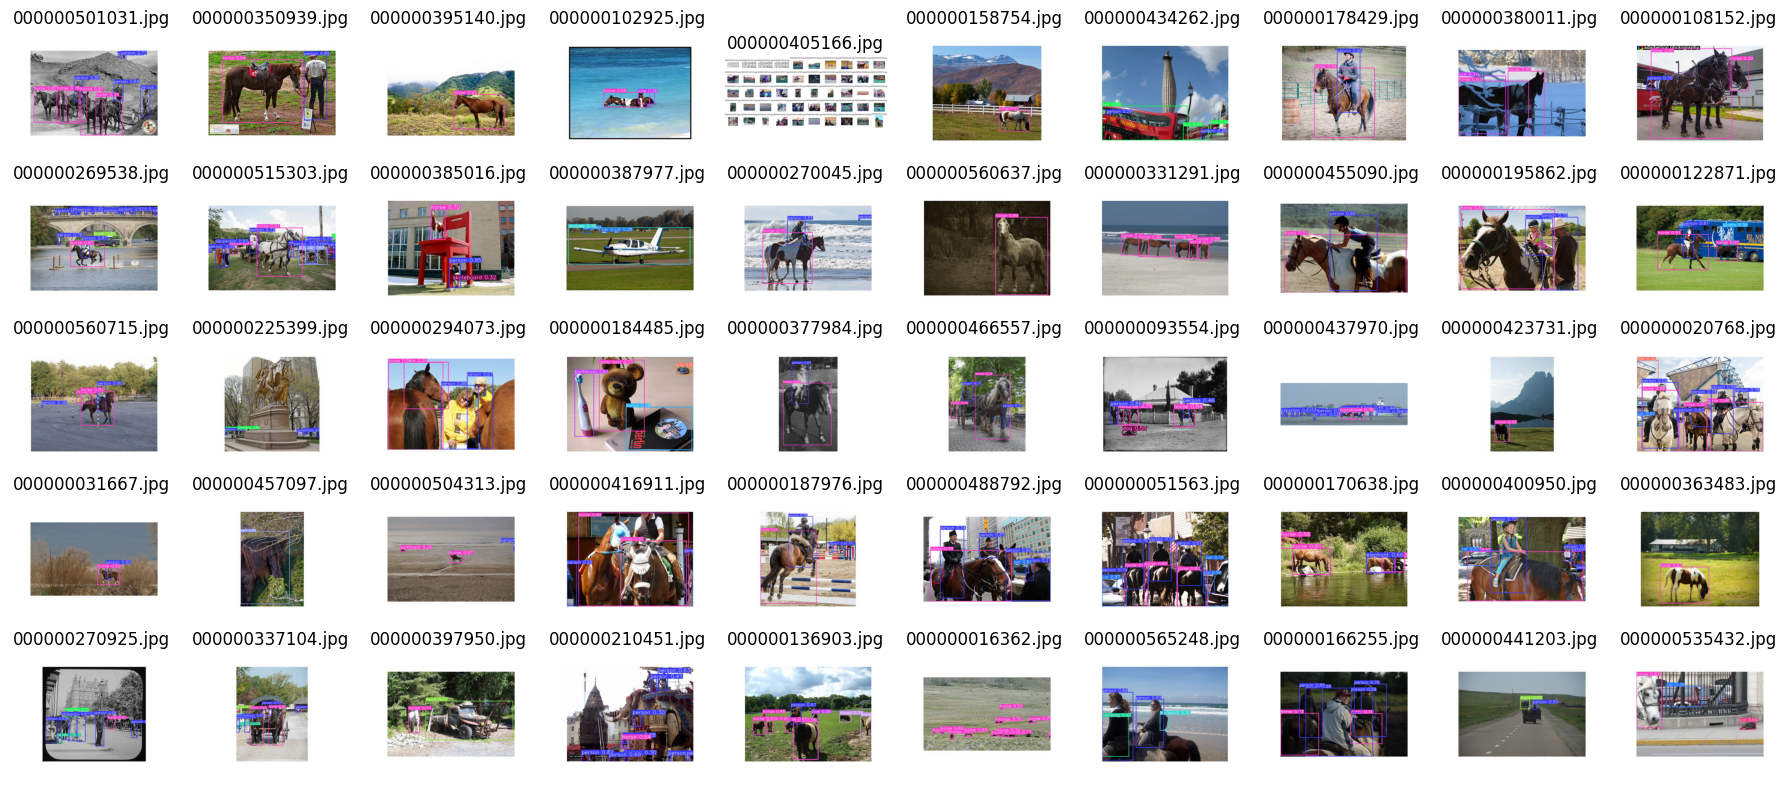

In [6]:
OUTPUT_PATH = HW3_ROOT_PATH + 'output_part1/yolov5/'
show_images(OUTPUT_PATH)

## YOLOv8 task (5 points)
You will repeat the same process you followed above but this time you will use YOLOv8.

In [10]:
!pip install ultralytics

In [17]:
## USE THIS SPACE
from ultralytics import YOLO
OUTPUT_PATH = HW3_ROOT_PATH + 'output_part1/yolov8/'
device = torch.device("cpu")

model = YOLO("yolov8n.pt").to(device)

image_paths = [str(img_path) for img_path in Path(PATH_TO_VAL).glob('*.jpg')][:50]

Path(OUTPUT_PATH).mkdir(parents=True, exist_ok=True)

for img_path in image_paths:
    img = cv2.imread(img_path)

    results = model(img)

    for r in results:
      im_array = r.plot()  # plot a BGR numpy array of predictions
      im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
      im.save(OUTPUT_PATH + Path(img_path).name)


0: 640x416 2 persons, 1 horse, 413.5ms
Speed: 3.6ms preprocess, 413.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 416)

0: 448x640 5 persons, 4 horses, 257.6ms
Speed: 3.3ms preprocess, 257.6ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 person, 1 horse, 272.4ms
Speed: 2.3ms preprocess, 272.4ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)

0: 512x640 1 person, 1 horse, 320.5ms
Speed: 2.9ms preprocess, 320.5ms inference, 2.4ms postprocess per image at shape (1, 3, 512, 640)

0: 576x640 1 horse, 352.4ms
Speed: 2.8ms preprocess, 352.4ms inference, 2.4ms postprocess per image at shape (1, 3, 576, 640)

0: 448x640 1 horse, 291.2ms
Speed: 2.8ms preprocess, 291.2ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)

0: 512x640 1 horse, 1 elephant, 244.3ms
Speed: 2.7ms preprocess, 244.3ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)

0: 480x640 2 buss, 202.6ms
Speed: 4.3ms preprocess, 202

In [4]:
OUTPUT_PATH = HW3_ROOT_PATH + 'output_part1/yolov8/'
show_images(OUTPUT_PATH)

Output hidden; open in https://colab.research.google.com to view.

## Submission guidelines
---
Plagiarism: plagiarism is strictly forbidden.   
Note: Please be advised that uploading your homework assignments to public platforms, such as GitHub, is strictly prohibited. Sharing your homework solutions in this manner (even after the course completion) constitutes a violation of academic integrity and will be treated as such.

### How to submit part 1
```
├── part1/
│   └── CSE527_23F_HW3.ipynb
```

Part 1 will only have the .ipynb file inside. Make sure all the code cells are executed and the output for each cell is present.


### Overall submission

Before preparing the zip fot BrightSpace submision, you will create _drive_url.txt_. This file will contain the Google drive URL `https://drive.google.com/drive/folders/FOLDER_ID?usp=drive_link` for the root working directory.
Permit the grading TA to access the folder: **kgarigapati@cs.stonybrook.edu**

Note: datasets or learned weights (except heads.pth) should not be a part of brightspace submission.  

This zip file should include the below mentioned files in the same folder structure:
```
{last name}_{first name}_{sbu id}_hw2/
├── part1/
│   └── CSE527_23F_HW3.ipynb
├── part2/
│   ├── CSE527_23F_HW3_P2.ipynb
│   └── detr/
│       ├── checkpoints/
│       │   └── heads.pth
│       ├── datasets/
│       │   ├── coco.py
│       │   ├── coco_eval.py
│       │   └── ...
│       ├── models/
│       │   ├── detr.py
│       │   ├── matcher.py
│       │   ├── ...
│       │   └── ...
│       ├── utils/
│       │   ├── ...
│       │   └── ...
│       ├── engine.py
│       ├── main.py
│       ├── hubconf.py
│       └── requirements.txt
├── part3/
│   ├── CSE527_23F_HW3_P3.ipynb
│   └── unet/
│       ├── utils/
│       │   ├── ...
│       │   └── ...
│       ├── coco.py
│       ├── main.py
│       ├── transforms.py
│       └── unet.py
└── drive_url.txt
```


Other Notes:  
Colab has a good feature of version control, you should take advantage of this to save your work properly. However, the timestamp of the submission made in brightspace is the only one that we consider for grading. To be more specific, we will only grade the version of your code right before the timestamp of the submission made in brightspace.

You are encouraged to post and answer questions on Piazza. Based on the amount of email that we have received in past years, there might be dealys in replying to personal emails. Please ask questions on Piazza and send emails only for personal issues.

**Late submission penalty:** <br>
There will be a 10% penalty per day for late submission. However, you will have 3 days throughout the whole semester to submit late without penalty. Note that the grace period is calculated by days instead of hours. If you submit the homework one minute after the deadline, one late day will be counted. Likewise, if you submit one minute after the deadline, the 10% penaly will be imposed if not using the grace period.